SECTION 1: INITIAL CODE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import MinMaxScaler
########################

function = 7
# Read the files
X_init = np.load("initial_inputs.npy")
y_init = np.load("initial_outputs.npy")
queries_file = "queries.txt"
observations_file = "observations.txt"

# Read queries data
import ast
queries_data = []
with open(queries_file, 'r') as f:
    for line in f:
        line = line.replace('array(', 'np.array(')
        queries_data.append(eval(line.strip()))

# Read observations data
observations_data = []
with open(observations_file, 'r') as f:
    for line in f:
        observations_data.append(eval(line.strip()))

# Extract the specified sub-arrays from queries
X = np.array([q[function - 1] for q in queries_data], dtype='float64')
y = np.array([o[function - 1] for o in observations_data])

# Find and remove duplicates
unique_indices = []
seen = set()
for i, x in enumerate(X):
    x_tuple = tuple(x)  # Convert to tuple for hashability
    if x_tuple not in seen:
        seen.add(x_tuple)
        unique_indices.append(i)

# Keep only unique queries and observations
X_unique = np.concatenate((X_init, X[unique_indices]))
y_unique = np.concatenate((y_init, y[unique_indices]))
queries_unique = [queries_data[i] for i in unique_indices]
observations_unique = [observations_data[i] for i in unique_indices]

# Save cleaned data to new files
with open("queries_unique.txt", "w") as f:
    for query in queries_unique:
        f.write(str(query) + "\n")

with open("observations_unique.txt", "w") as f:
    for obs in observations_unique:
        f.write(str(obs) + "\n")

# Save cleaned numpy arrays
np.save("initial_inputs_unique.npy", X_unique)
np.save("initial_outputs_unique.npy", y_unique)
#############################

# Create DataFrame
df = pd.DataFrame({
    'param1': X_unique[:, 0],
    'param2': X_unique[:, 1],
    'param3': X_unique[:, 2],
    'param4': X_unique[:, 3],
    'param5': X_unique[:, 4],
    'param6': X_unique[:, 5],
    'output': y_unique
})
###########################

# Find the row with the maximum output
best_row_max = df.loc[df['output'].idxmax()]
print("Best hyperparameters (highest output):")
print(best_row_max)
####################

from skopt import gp_minimize
from skopt.space import Real
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np



# Define the hyperparameter space
space = [
    Real(0.0, 1.0, name='param1'),
    Real(0.0, 1.0, name='param2'),
    Real(0.0, 1.0, name='param3'),
    Real(0.0, 1.0, name='param4'),
    Real(0.0, 1.0, name='param5'),
    Real(0.0, 1.0, name='param6')
]

# Prepare data
X = df[['param1', 'param2', 'param3', 'param4', 'param5', 'param6']].values
y = df['output'].values

# Train a surrogate model
surrogate_model = RandomForestRegressor(n_estimators=150, random_state=42)
surrogate_model.fit(X, y)

# Define the objective function (negate output for maximization)
def objective(params):
    pred = surrogate_model.predict([params])[0]
    return -pred  # Negate to maximize

# Run Bayesian Optimization with corrected x0
best_params_list = best_row_max[['param1', 'param2', 'param3', 'param4', 'param5', 'param6']].values.tolist()

res = gp_minimize(
    objective,
    space,
    n_calls=50,  # Number of evaluations
    random_state=42,
    x0=[best_params_list],  # Corrected: single list of 6 values
    n_random_starts=10
)

# Best hyperparameters and predicted output
best_params = dict(zip(['param1', 'param2', 'param3', 'param4', 'param5', 'param6'], res.x))
print("Best hyperparameters from Bayesian Optimization:")
print(best_params)
print("Predicted output:", -res.fun)  # Negate back to get the actual output


Best hyperparameters (highest output):
param1    0.191597
param2    0.252712
param3    0.390953
param4    0.229106
param5    0.363287
param6    0.861946
output    2.114693
Name: 70, dtype: float64
Best hyperparameters from Bayesian Optimization:
{'param1': 0.191597, 'param2': 0.252712, 'param3': 0.390953, 'param4': 0.229106, 'param5': 0.363287, 'param6': 0.861946}
Predicted output: 1.9323146725336273


SECTION 2: CODE MODIFICATION

SECTION 3: FINAL RESULT

Best hyperparameters (highest output):
param1    0.191597
param2    0.252712
param3    0.390953
param4    0.229106
param5    0.363287
param6    0.861946
output    2.114693
Name: 70, dtype: float64

Best known point (best_row_max):
      param1    param2    param3    param4    param5    param6    output
70  0.191597  0.252712  0.390953  0.229106  0.363287  0.861946  2.114693

Added 5 new points via LHS sampling
Iteration No: 1 started. Evaluating function at provided point.
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 0.0045
Function value obtained: -1.9497
Current minimum: -1.9497
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -0.2321
Current minimum: -1.9497
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0078
Function value obtained: -0.3352
Current minimum: -1.94

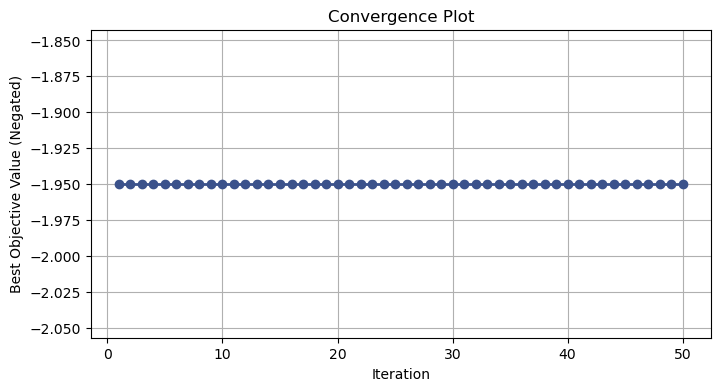


Number of unique points explored: 50

Actual Model Output with Best Parameters: 0.7401418500000001


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import MinMaxScaler
####################################

function = 7
# Read the files
X_init = np.load("initial_inputs.npy")
y_init = np.load("initial_outputs.npy")
queries_file = "queries.txt"
observations_file = "observations.txt"

# Read queries data
import ast
queries_data = []
with open(queries_file, 'r') as f:
    for line in f:
        line = line.replace('array(', 'np.array(')
        queries_data.append(eval(line.strip()))

# Read observations data
observations_data = []
with open(observations_file, 'r') as f:
    for line in f:
        observations_data.append(eval(line.strip()))

# Extract the specified sub-arrays from queries
X = np.array([q[function - 1] for q in queries_data], dtype='float64')
y = np.array([o[function - 1] for o in observations_data])

# Find and remove duplicates
unique_indices = []
seen = set()
for i, x in enumerate(X):
    x_tuple = tuple(x)  # Convert to tuple for hashability
    if x_tuple not in seen:
        seen.add(x_tuple)
        unique_indices.append(i)

# Keep only unique queries and observations
X_unique = np.concatenate((X_init, X[unique_indices]))
y_unique = np.concatenate((y_init, y[unique_indices]))
queries_unique = [queries_data[i] for i in unique_indices]
observations_unique = [observations_data[i] for i in unique_indices]

# Save cleaned data to new files
with open("queries_unique.txt", "w") as f:
    for query in queries_unique:
        f.write(str(query) + "\n")

with open("observations_unique.txt", "w") as f:
    for obs in observations_unique:
        f.write(str(obs) + "\n")

# Save cleaned numpy arrays
np.save("initial_inputs_unique.npy", X_unique)
np.save("initial_outputs_unique.npy", y_unique)
##############################

# Create DataFrame
df = pd.DataFrame({
    'param1': X_unique[:, 0],
    'param2': X_unique[:, 1],
    'param3': X_unique[:, 2],
    'param4': X_unique[:, 3],
    'param5': X_unique[:, 4],
    'param6': X_unique[:, 5],
    'output': y_unique
})
#########################

# Find the row with the maximum output
best_row_max = df.loc[df['output'].idxmax()]
print("Best hyperparameters (highest output):")
print(best_row_max)
############################

from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from skopt.plots import plot_convergence
from scipy.stats import qmc

# Generate synthetic dataset (replace with your actual data)
X_data, y_data = make_classification(
    n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

def evaluate_actual_model(params):
    """
    Evaluate a Random Forest Classifier with given hyperparameters.
    Args:
        params (dict): Hyperparameters {'param1': value, ..., 'param6': value}
    Returns:
        float: Scaled accuracy score
    """
    hyperparams = {
        'n_estimators': int(10 + params['param1'] * (200 - 10)),  # [10, 200]
        'max_depth': int(3 + params['param2'] * (30 - 3)) if params['param2'] < 0.9 else None,  # [3, 30] or None
        'min_samples_split': int(2 + params['param3'] * (20 - 2)),  # [2, 20]
        'min_samples_leaf': int(1 + params['param4'] * (10 - 1)),  # [1, 10]
        'max_features': 0.1 + params['param5'] * (1.0 - 0.1),  # [0.1, 1.0]
        'ccp_alpha': params['param6'] * 0.1,  # [0, 0.1]
        'random_state': 42
    }
    model = RandomForestClassifier(**hyperparams)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    # Scale accuracy to match df output range (0 to 2.114691)
    accuracy_scaled = accuracy * 2.114691 / 0.9  # Assume accuracy in [0, 0.9]
    return accuracy_scaled

# Prepare data
df = df.drop_duplicates(subset=['param1', 'param2', 'param3', 'param4', 'param5', 'param6', 'output'], keep='first')
X = df[['param1', 'param2', 'param3', 'param4', 'param5', 'param6']].values
y = df['output'].values

# Define best_row_max
best_row_max = df.loc[[df['output'].idxmax()]]
print("\nBest known point (best_row_max):")
print(best_row_max)

# Enrich data with LHS sampling
sampler = qmc.LatinHypercube(d=6, seed=42)
lhs_samples = sampler.random(n=5)
best_point = best_row_max[['param1', 'param2', 'param3', 'param4', 'param5', 'param6']].values[0]
new_points = np.clip(best_point + (lhs_samples - 0.5) * 0.1, 0, 1)
new_outputs = [evaluate_actual_model(dict(zip([f'param{i+1}' for i in range(6)], point))) for point in new_points]
X = np.vstack([X, new_points])
y = np.concatenate([y, new_outputs])
print("\nAdded 5 new points via LHS sampling")

# Define hyperparameter space
space = [Real(0.0, 1.0, name=f'param{i+1}') for i in range(6)]

# Train surrogate model
surrogate_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit surrogate
surrogate_model.fit(X, y)

# Objective function
@use_named_args(space)
def objective(**params):
    param_values = [params[f'param{i+1}'] for i in range(6)]
    pred = surrogate_model.predict([param_values])[0]
    return -pred  # Negate to maximize

# Initial point
initial_point = best_row_max[['param1', 'param2', 'param3', 'param4', 'param5', 'param6']].values.flatten().tolist()

# Run optimization
res = gp_minimize(
    objective,
    space,
    n_calls=50,
    n_random_starts=10,
    acq_func='EI',
    xi=0.5,
    x0=[initial_point],
    random_state=42,
    verbose=True
)

# Best hyperparameters
best_params = dict(zip([f'param{i+1}' for i in range(6)], res.x))
print("\nBest Hyperparameters from Bayesian Optimization:")
print(best_params)
print("Predicted Output:", -res.fun)

# Diagnostics
plt.figure(figsize=(8, 4))
plot_convergence(res)
plt.title("Convergence Plot")
plt.xlabel("Iteration")
plt.ylabel("Best Objective Value (Negated)")
plt.show()

unique_points = len(np.unique(res.x_iters, axis=0))
print(f"\nNumber of unique points explored: {unique_points}")

# Validate best parameters
actual_output = evaluate_actual_model(best_params)
print("\nActual Model Output with Best Parameters:", actual_output)